# This scripts is used to detect the patterns of passers' pre-/post-passing scores

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [36]:
# This function is used to output errors and slopes of learners' pre-/post-passing scores
# Input: weekly grade and passing week
# output: slope_pre, error_pre, slope_past, error_past, changes of slopes(slope_pre-slope_past)
def grade_pattern_detect(score, week, passing_week):
    index_passing_week = week.index(passing_week)
    score_pre = score[0:index_passing_week+1]
    week_pre = week[0:index_passing_week+1]
    print week_pre
    score_post = score[index_passing_week:]
    week_post = week[index_passing_week:]
    print week_post
    # http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html
    slope_pre, intercept_pre, r_value_pre, p_value_pre, std_err_pre = stats.linregress(week_pre,score_pre)
    slope_post, intercept_post, r_value_post, p_value_post, std_err_post = stats.linregress(week_post,score_post)
#     fit_pre = np.polyfit(week_pre,score_pre,1)
#     print fit_pre
#     fit_fn_pre = np.poly1d(fit_pre)
#     fit_post = np.polyfit(week_post,score_post,1)
#     print fit_post
#     fit_fn_post = np.poly1d(fit_post)
    a = [slope_pre, intercept_pre, r_value_pre, p_value_pre, std_err_pre]
    b = [slope_post, intercept_post, r_value_post, p_value_post, std_err_post]
    return a, b #, fit_pre, fit_post

## Demo

In [67]:
# # Score Keeper
# score = [0.888888888889,0.888888888889,0.924528301887,0.933333333333,0.790697674419,0.888888888889,0.12,0.826086956522] 
# passing_week = 5

# # Score Reducer
# score = [1.0,0.955555555556,1.0,0.911111111111,0.837209302326,0.777777777778,0.28,0.0]
# passing_week = 5

# # Score Chaser 1
# score = [0.666666666667,0.777777777778,0.905660377358,0.8,0.720930232558,0.5,0.76,1.0]
# passing_week = 7

# Score Chaser 2
score = [0.0,0.0,1.0,0.916129032258,0.960784313725,1.0,0.583333333333,0.91935483871]
passing_week = 7

week = [1,2,3,4,5,6,7,8]

index_passing_week = week.index(passing_week)
score_pre = score[0:index_passing_week+1]
week_pre = week[0:index_passing_week+1]
score_post = score[index_passing_week:]
week_post = week[index_passing_week:]

a, b = grade_pattern_detect(score, week, passing_week)
print a
print b
fit_fn_pre = np.poly1d(a[0:2])
fit_fn_post = np.poly1d(b[0:2])
print a[0]-b[0]

[1, 2, 3, 4, 5, 6, 7]
[7, 8]
[0.13252801120442856, 0.10706605222742871, 0.6245682836850619, 0.13376452515547474, 0.074110068837722212]
[0.33602150537700004, -1.7688172043060002, 1.0, nan, nan]
-0.203493494173


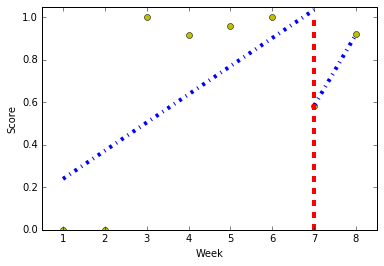

In [68]:
# fit_fn = 
%matplotlib inline

plt.ylabel('Score')
plt.xlabel('Week')
plt.plot(week, score, 'yo')
# f_pre(x) = lambda x: a[0] * x + a[1]
# f_post(x) = lambda x: b[0] * x + b[1]
plt.plot(week_pre, fit_fn_pre(week_pre), "b-.", linewidth=4)
plt.plot(week_post, fit_fn_post(week_post), "b-.", linewidth=4)
plt.plot([passing_week, passing_week], [0, 1], 'r', linestyle='--', linewidth=4)
plt.xlim(week[0]-0.5, week[-1]+0.5)
plt.ylim(0, 1.05)
plt.show()

## Batch Processing
Given passers' weekly scores (like "FP101x_3T2015_grade_byweek_alt.csv" generated in previous processing) and passers' group (like "FP101x_3T2015_group.csv"), our method can generate a dataframe whose columns are course_learner_id, slope_pre, intercept_pre, std_err_pre, slope_post, intercept_post, std_err_post and slope_changes.